In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = './spam.csv'
df = pd.read_csv(url, encoding='latin-1')
df.head()

,class,mail,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df = df.iloc[:, :2]
df.head()

,class,mail
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df['class'].unique()

array(['ham', 'spam'], dtype=object)

In [5]:
df['class'] = df['class'].map({'spam': 1, 'ham': 0})

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df['mail'], df['class'], test_size=0.2)

In [7]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [8]:
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

MultinomialNB()

In [9]:
predictions = model.predict(X_test_vectorized)

In [10]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: ",accuracy * 100,"%")

Accuracy:  98.47533632286995 %


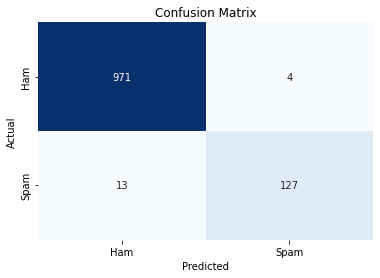

In [11]:
conf_mat = confusion_matrix(y_test, predictions)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [12]:
new_emails = [
    "Get a special offer today!",
    "Hi, how are you doing?",
    "Congratulations, you've won a prize!",
    "Meeting at 3 PM in the conference room."
]

In [13]:
new_emails_vectorized = vectorizer.transform(new_emails)
new_predictions = model.predict(new_emails_vectorized)

In [14]:
predicted_labels = ['SPAM' if pred == 1 else 'SAFE' for pred in new_predictions]

In [15]:
for email, prediction in zip(new_emails, predicted_labels):
    print(email,": ",prediction)

Get a special offer today! :  SAFE
Hi, how are you doing? :  SAFE
Congratulations, you've won a prize! :  SPAM
Meeting at 3 PM in the conference room. :  SAFE
